In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

### Importing data

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Data Cleaning

In [3]:
titanic.shape

(499, 11)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  499 non-null    int64  
 1   Survived     499 non-null    int64  
 2   Pclass       499 non-null    int64  
 3   Name         499 non-null    object 
 4   Sex          499 non-null    object 
 5   Age          397 non-null    float64
 6   SibSp        499 non-null    int64  
 7   Parch        499 non-null    int64  
 8   Ticket       499 non-null    object 
 9   Fare         499 non-null    float64
 10  Embarked     498 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 43.0+ KB


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            102
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         1
dtype: int64

In [6]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [7]:
titanic.drop(["Fare"],axis=1,inplace=True)

In [8]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [9]:
titanic.shape

(499, 10)

In [10]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [11]:
titanic.dropna(inplace=True)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S


In [13]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
titanic["Embarked"] = titanic["Embarked"].replace({"C":0,"Q":1,"S":2})

In [15]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,"female":1})

In [16]:
titanic.drop(["PassengerId","Pclass","Name","SibSp","Parch","Ticket"],axis=1,inplace=True)

In [17]:
titanic.sample(5)

,Survived,Sex,Age,Embarked
341,1,1,24.000000,2
173,0,0,21.000000,2
448,1,1,5.000000,0
19,1,1,29.217884,0
29,0,0,29.217884,2


In [18]:
titanic.corr()

,Survived,Sex,Age,Embarked
Survived,1.000000,0.574609,-0.099072,-0.159399
Sex,0.574609,1.000000,-0.095205,-0.137858
Age,-0.099072,-0.095205,1.000000,-0.058231
Embarked,-0.159399,-0.137858,-0.058231,1.000000


In [19]:
titanic.var()

Survived      0.237656
Sex           0.233761
Age         169.809741
Embarked      0.618289
dtype: float64

In [20]:
titanic.dropna(inplace=True)

#### Visualisation

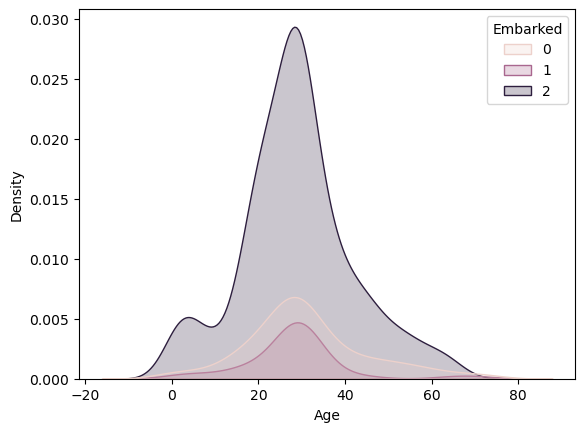

In [21]:
sns.kdeplot(data=titanic,x="Age",hue="Embarked",fill=True)
plt.show()

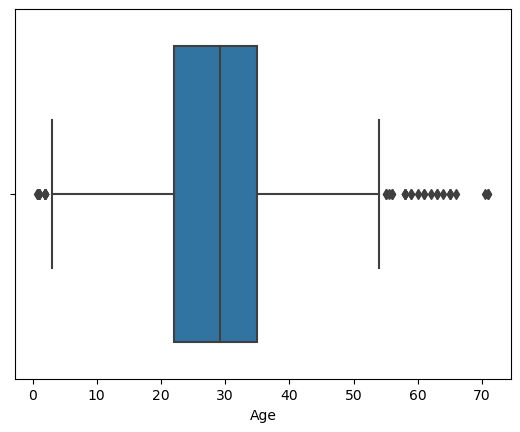

In [22]:
sns.boxplot(data=titanic,x="Age")
plt.show()

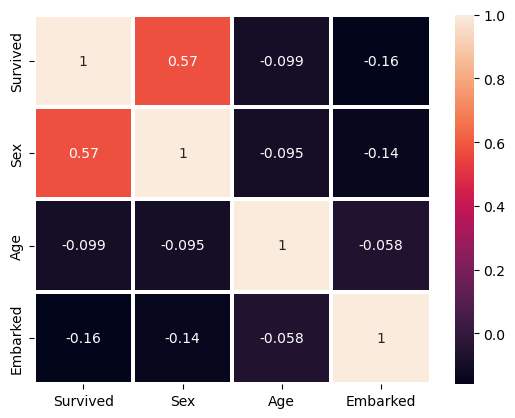

In [23]:
sns.heatmap(titanic.corr(),annot=True,linewidth=1.5)
plt.show()

#### Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [44]:
# split into training and testing sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# example prediction
new_data = {'Sex': [0], 'Age': [30], 'Embarked': [2]}
new_df = pd.DataFrame(data=new_data)
prediction = model.predict(new_df)
print(prediction)

new_data = { 'Sex': [1], 'Age': [23], 'Embarked': [0]}
new_df = pd.DataFrame(data=new_data)
prediction = model.predict(new_df)
print(prediction)


              precision    recall  f1-score   support

           0       0.81      0.95      0.88        63
           1       0.88      0.62      0.73        37

    accuracy                           0.83       100
   macro avg       0.85      0.79      0.80       100
weighted avg       0.84      0.83      0.82       100

[[60  3]
 [14 23]]
[0]
[1]


In [46]:
titanic.to_csv("titanic_updated.csv")

In [50]:
new_data = pd.read_csv("titanic_updated.csv")
new_data.drop(["Unnamed: 0","Survived"],axis=1,inplace=True)

In [51]:
prediction = model.predict(new_data)
print(prediction)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.83

In [56]:
confusion_matrix(y_test, y_pred)

array([[60,  3],
       [14, 23]], dtype=int64)